# Using SVK Mimer "API" for actuall wind energy production

## Initial query and CSV parsing testing

In [1]:
# Carl von Rosen Johansson 2019-04-20
import pandas as pd
import numpy as np
from datetime import datetime
import calendar
import matplotlib.pyplot as plt

csv_url_string = "https://mimer.svk.se/ProductionConsumption/DownloadText?PeriodFrom=03%2F30%2F2019%2000%3A00%3A00&PeriodTo=04%2F06%2F2019%2010%3A10%3A55&ConstraintAreaId=SN0&ProductionSortId=VI"

test = pd.read_csv(csv_url_string,sep=';',parse_dates=True,decimal=',') # 

test.head()

,Period,Planerad (kWh),Avräknad (kWh),Publiceringstidpunkt,Unnamed: 4
0,2019-03-30 00:00,NaN,4975408.173,2019-04-05 10:01,NaN
1,2019-03-30 01:00,NaN,4718669.599,2019-04-05 10:01,NaN
2,2019-03-30 02:00,NaN,4402917.724,2019-04-05 10:01,NaN
3,2019-03-30 03:00,NaN,4199060.526,2019-04-05 10:01,NaN
4,2019-03-30 04:00,NaN,4141460.816,2019-04-04 14:01,NaN


In [2]:
test['Avräknad (kWh)'].head()

0    4975408.173
1    4718669.599
2    4402917.724
3    4199060.526
4    4141460.816
Name: Avräknad (kWh), dtype: float64

## Plot wind over time

In [3]:
solar = 'SE' # Solarpower
wind = 'VI'  # Onshore windpower
hydro = 'VA' # Hydropower
nucle = 'KK'  # Nuclearpower
wave = 'VK'  # Wavepower
gas = 'GA'   # Gasturbine/Disel 
heat = 'OK'  # Other heat power
other = 'OP' # Other production

start_mm = '01'
start_dd = '01'
start_yy = '2016'

end_mm = datetime.today().month-1
end_yy = datetime.today().year
end_dd = calendar.monthrange(end_yy,end_mm)[1]
date_from = '{}%2F{}%2F{}%2000%3A00%3A00'.format(start_mm,start_dd,start_yy) #[month '/' day '/' year ' ' hh ':' mm ':' ss] # / = %2F , : = %3A
date_to = '{}%2F{}%2F{}%2023%3A59%3A59'.format(end_mm,end_dd,end_yy)         #[month '/' day '/' year ' ' hh ':' mm ':' ss]
csv_url_string = ''.join(['https://mimer.svk.se/ProductionConsumption/DownloadText?PeriodFrom=', 
                  date_from, '&PeriodTo=', date_to,
                  '&ConstraintAreaId=SN0&ProductionSortId=', wind])
print(csv_url_string)
test = pd.read_csv(csv_url_string,sep=';',decimal=',',parse_dates=True)
test.drop(test.tail(1).index,inplace=True)
period_data = pd.to_datetime(test['Period'], format='%Y-%m-%d %H:%M')
wind_data = pd.DataFrame({'period': period_data,'mwh': test['Avräknad (kWh)']/1000})
wind_data['period'].tail()

https://mimer.svk.se/ProductionConsumption/DownloadText?PeriodFrom=01%2F01%2F2016%2000%3A00%3A00&PeriodTo=3%2F31%2F2019%2023%3A59%3A59&ConstraintAreaId=SN0&ProductionSortId=VI


28242   2019-03-31 19:00:00
28243   2019-03-31 20:00:00
28244   2019-03-31 21:00:00
28245   2019-03-31 22:00:00
28246   2019-03-31 23:00:00
Name: period, dtype: datetime64[ns]

## Compare month by month 2019

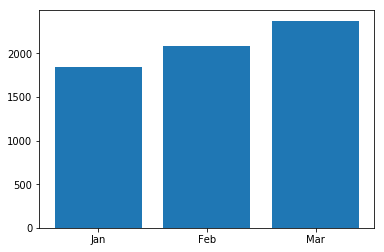

In [4]:
jan = wind_data['mwh'].loc[(wind_data['period'].dt.month == 1) & (wind_data['period'].dt.year == 2019)].sum()/1000 #GWh
feb = wind_data['mwh'].loc[(wind_data['period'].dt.month == 2) & (wind_data['period'].dt.year == 2019)].sum()/1000 #GWh
mar = wind_data['mwh'].loc[(wind_data['period'].dt.month == 3) & (wind_data['period'].dt.year == 2019)].sum()/1000 #GWh

plt.bar(['Jan','Feb','Mar'],[jan,feb,mar])
plt.show()

## Compare over time

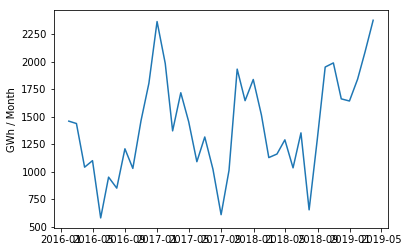

In [5]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

per_month = wind_data.set_index('period').groupby(pd.Grouper(freq='M'))['mwh'].sum()/1000

x = per_month.index
y = per_month.values

plt.plot(x,y)
plt.ylabel('GWh / Month')
plt.show()

## Display GWh by month

In [6]:
per_month

period
2016-01-31    1458.670314
2016-02-29    1436.978526
2016-03-31    1040.394003
2016-04-30    1099.852028
2016-05-31     579.485831
2016-06-30     949.957455
2016-07-31     850.128181
2016-08-31    1207.479555
2016-09-30    1029.254258
2016-10-31    1462.089497
2016-11-30    1802.982553
2016-12-31    2363.276861
2017-01-31    1982.801876
2017-02-28    1370.286289
2017-03-31    1716.596147
2017-04-30    1453.173407
2017-05-31    1090.140117
2017-06-30    1314.862974
2017-07-31    1022.332754
2017-08-31     608.962103
2017-09-30    1011.354610
2017-10-31    1931.255051
2017-11-30    1644.769418
2017-12-31    1837.142806
2018-01-31    1514.411851
2018-02-28    1127.580568
2018-03-31    1159.996791
2018-04-30    1288.826460
2018-05-31    1034.374480
2018-06-30    1352.084831
2018-07-31     652.863968
2018-08-31    1294.012928
2018-09-30    1950.158634
2018-10-31    1987.599664
2018-11-30    1661.127629
2018-12-31    1641.666344
2019-01-31    1840.219778
2019-02-28    2085.558468
2019-